# Process: Acquire / Build / Evaluate
* Acquire | Inspect | Create | Preprocess
* Build | Compile | Fit (Train)
* Evaluate

In [ ]:
!kaggle datasets download -d viveksharmar/flight-price-data/data

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


* zip commands not needed because we could not load it; probably due to temporary nature of GUI:
* import zipfile as zf
* zf = zf.ZipFile('flight-price-data.zip')
* zf.extractall()


# **ACQUIRE**: "kaggle", open, append, DataFrame

In [69]:
import csv
fileCSV = open('sample_data/flight_dataset.csv')
csv_reader = csv.DictReader(fileCSV)
csv_reader.fieldnames


['Airline',
 'Source',
 'Destination',
 'Total_Stops',
 'Price',
 'Date',
 'Month',
 'Year',
 'Dep_hours',
 'Dep_min',
 'Arrival_hours',
 'Arrival_min',
 'Duration_hours',
 'Duration_min']

In [70]:
flight_data = []
for row in csv_reader:
  flight_data.append(row)

In [71]:
import pandas as pd
dataFrame = pd.DataFrame(flight_data)
dataFrame.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45


# INSPECT: randint, hist

In [72]:
import random
#random.seed(42)
random.seed()
randomIdx = random.randint(0, len(dataFrame) - 1)
dataFrame.iloc[randomIdx]

,3783
Airline,Jet Airways
Source,Delhi
Destination,Cochin
Total_Stops,2
Price,15318
Date,6
Month,6
Year,2019
Dep_hours,20
Dep_min,0


<Axes: >

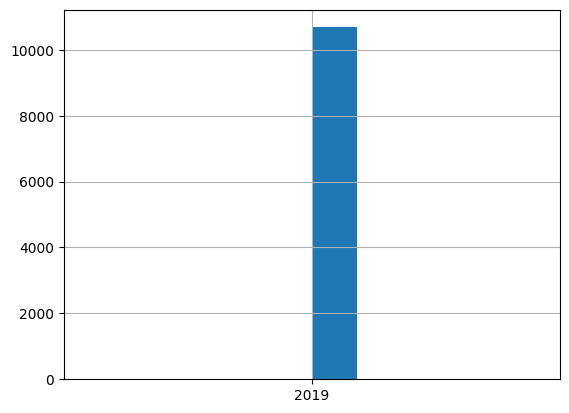

In [73]:
dataFrame["Year"].hist()

# SPLITS: train_test_split, drop

In [75]:
train_test_split = int(len(dataFrame) * 0.8)
print("train_test_split: ", train_test_split)

X_train, y_train = dataFrame.drop('Price', axis=1)[:train_test_split], dataFrame['Price'][:train_test_split]
X_tests, y_tests = dataFrame.drop('Price', axis=1)[train_test_split:], dataFrame['Price'][train_test_split:]

len(X_train), len(y_train), len(X_tests), len(y_tests)

train_test_split:  8546


(8546, 8546, 2137, 2137)

# PREPROCESS: colTransform, fit, transform

In [76]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

colTransform = make_column_transformer(
  (MinMaxScaler(),["Total_Stops", "Date", "Month", "Year", "Dep_hours", "Dep_min", "Arrival_hours", "Arrival_min", "Duration_hours", "Duration_min"]),
  (OneHotEncoder(handle_unknown="ignore"), ["Destination", "Source", "Airline"])
)
colTransform.fit(X_train)

X_train_normal = colTransform.transform(X_train)
X_tests_normal = colTransform.transform(X_tests)
# X_train_normal[0], X_tests_normal[0]
print( X_train_normal[0], X_tests_normal[0] )

[0.         0.88461538 0.         0.         0.95652174 0.36363636
 0.04347826 0.18181818 0.02173913 0.90909091 0.         0.
 0.         0.         0.         1.         1.         0.
 0.         0.         0.         0.         0.         0.
 1.         0.         0.         0.         0.         0.
 0.         0.         0.        ] [0.66666667 1.         0.         0.         0.2173913  0.18181818
 0.7826087  0.90909091 0.26086957 0.72727273 0.         1.
 0.         0.         0.         0.         0.         0.
 1.         0.         0.         0.         0.         0.
 0.         1.         0.         0.         0.         0.
 0.         0.         0.        ]


In [77]:
# some other views...
print( X_train_normal.shape, X_tests_normal.shape )
print( X_train.shape, X_tests.shape )
print( [0., 0.88461538, 0., 0., 0.95652174, 0.36363636, 0.04347826, 0.18181818, 0.02173913, 0.90909091, 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.] )

(8546, 33) (2137, 33)
(8546, 13) (2137, 13)
[0.0, 0.88461538, 0.0, 0.0, 0.95652174, 0.36363636, 0.04347826, 0.18181818, 0.02173913, 0.90909091, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


---
# BUILD: Build, Compile, Fit


In [78]:
import numpy as np
import tensorflow as tf

# tf is framework for building ml algorithm
# y_train was made from the Splits as str, need to convert
y_train = np.array(y_train, dtype=np.float32)
tf.random.set_seed(42)

# keras is tf ml part, Sequential (uses hidden layers in seq) or Functional
# dense layer is a layer where all nodes are connected to every other node
model = tf.keras.Sequential([
	tf.keras.layers.Dense(33),	# based on total count of normal.shape items
	tf.keras.layers.Dense(100),	# arbitrary
	tf.keras.layers.Dense(100),	# arbitrary
	tf.keras.layers.Dense(1)    # concludes with 1 in this case
], name="flight_price_model")


In [79]:
# losses: loss function quantifies difference between a models predicted outputs & actual target values
# mae: "Mean Absolute Error" quantifies average absolute difference between predicted values & actual target values
# optimizers: specialized algorithm to dynamically refine weights & biases from feedback of data, aiming to converge upon optimal model parameters
model.compile(loss=tf.keras.losses.mae,
	optimizer=tf.keras.optimizers.Adam(),
	metrics=["mae"])


In [80]:
# X_train_normal:	preprocessed data that has been onehot encoded and MinMaxScaled
# y_train:	prices of each flight that we are using to train the model on
# One epoch = one complete pass through the entire training datase
model_history = model.fit(X_train_normal, y_train, epochs=100)


Epoch 1/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7470.4521 - mae: 7470.4521
Epoch 2/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2375.3367 - mae: 2375.3367
Epoch 3/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2073.3557 - mae: 2073.3557
Epoch 4/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2009.3350 - mae: 2009.3350
Epoch 5/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1982.5809 - mae: 1982.5809
Epoch 6/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1968.5426 - mae: 1968.5426
Epoch 7/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1962.9772 - mae: 1962.9772
Epoch 8/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1959.7788 - mae: 1959.7788
Epoch 9/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1956.6201 - mae: 1956.6201
Epoch 10/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1955.7617 - mae: 1955.7617
Epoch 11/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1953.6678 - mae: 1953.6678
Epoch 12/100
268/268 ━━━━━━━━━

# EVALUTE: Evaluate & Save Model

In [81]:
y_tests = np.array(y_tests, dtype=np.float32)
model.evaluate(X_tests_normal, y_tests)

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1881.5339 - mae: 1881.5339


[1847.968505859375, 1847.968505859375]

In [94]:
model.save("sample_data/saved_model_flight_prices.keras")

In [96]:
loaded_model = tf.keras.models.load_model("sample_data/saved_model_flight_prices.keras")

In [97]:
loaded_model.layers

[<Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>,
 <Dense name=dense_6, built=True>,
 <Dense name=dense_7, built=True>]

In [98]:
loaded_model.summary()

Model: "flight_price_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 33)             │         1,122 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │         3,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,171 (172.55 KB)

 Trainable params: 14,723 (57.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 29,448 (115.04 KB)